# Practice notebook for multivariate analysis using NHANES data

This notebook will give you the opportunity to perform some multivariate analyses on your own using the NHANES study data.  These analyses are similar to what was done in the week 3 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

da = pd.read_csv("nhanes_2015_2016.csv")
da.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

## Question 1

Make a scatterplot showing the relationship between the first and second measurements of diastolic blood pressure ([BPXDI1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXDI1) and [BPXDI2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXDI2)).  Also obtain the 4x4 matrix of correlation coefficients among the first two systolic and the first two diastolic blood pressure measures.

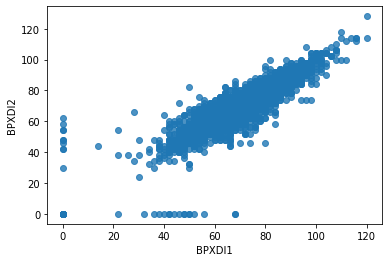

In [4]:
# Scatter Plot
sns.regplot(x="BPXDI1", y="BPXDI2", data=da, fit_reg = False)
plt.show()

In [5]:
# Correlation Coefficient Matrix
print(da.loc[:, ["BPXDI1", "BPXDI2", 'BPXSY1', 'BPXSY2']].dropna().corr())

          BPXDI1    BPXDI2    BPXSY1    BPXSY2
BPXDI1  1.000000  0.884722  0.317497  0.329843
BPXDI2  0.884722  1.000000  0.277681  0.298392
BPXSY1  0.317497  0.277681  1.000000  0.962287
BPXSY2  0.329843  0.298392  0.962287  1.000000


__Q1a.__ How does the correlation between repeated measurements of diastolic blood pressure relate to the correlation between repeated measurements of systolic blood pressure?

Repeated measures of systolic blood pressure are more often the same than repeated measures of systolic blood pressure.

__Q1b.__ Are the second systolic and second diastolic blood pressure measure more correlated or less correlated than the first systolic and first diastolic blood pressure measure?

First set is more correlated.

## Question 2

Construct a grid of scatterplots between the first systolic and the first diastolic blood pressure measurement.  Stratify the plots by gender (rows) and by race/ethnicity groups (columns).

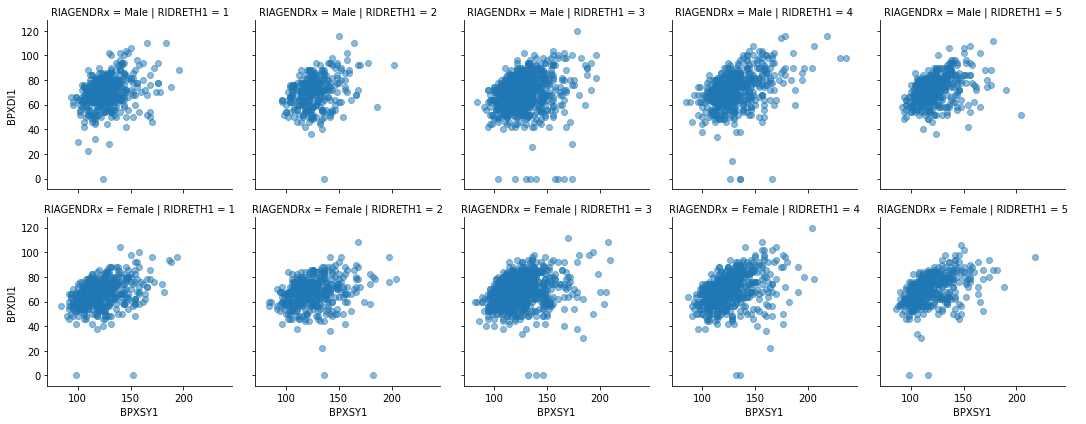

In [8]:
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"}) 
grid = sns.FacetGrid(da, col="RIDRETH1",  row="RIAGENDRx").map(
    plt.scatter, "BPXSY1", "BPXDI1", alpha=0.5).add_legend()

__Q2a.__ Comment on the extent to which these two blood pressure variables are correlated to different degrees in different demographic subgroups.

In [23]:
print(da.groupby(['RIDRETH1','RIAGENDRx'])[["BPXDI1", 'BPXSY1']].corr())

                             BPXDI1    BPXSY1
RIDRETH1 RIAGENDRx                           
1        Female    BPXDI1  1.000000  0.351912
                   BPXSY1  0.351912  1.000000
         Male      BPXDI1  1.000000  0.302742
                   BPXSY1  0.302742  1.000000
2        Female    BPXDI1  1.000000  0.239737
                   BPXSY1  0.239737  1.000000
         Male      BPXDI1  1.000000  0.306427
                   BPXSY1  0.306427  1.000000
3        Female    BPXDI1  1.000000  0.241947
                   BPXSY1  0.241947  1.000000
         Male      BPXDI1  1.000000  0.207470
                   BPXSY1  0.207470  1.000000
4        Female    BPXDI1  1.000000  0.378335
                   BPXSY1  0.378335  1.000000
         Male      BPXDI1  1.000000  0.423597
                   BPXSY1  0.423597  1.000000
5        Female    BPXDI1  1.000000  0.438976
                   BPXSY1  0.438976  1.000000
         Male      BPXDI1  1.000000  0.370852
                   BPXSY1  0.37085

Moderate correlation throughout but ethnic group 3 has the lowest correlation. Males in ethnic group 4 an females in ethnic group 5 have the strongest correlations.

## Question 3

Use "violin plots" to compare the distributions of ages within groups defined by gender and educational attainment.

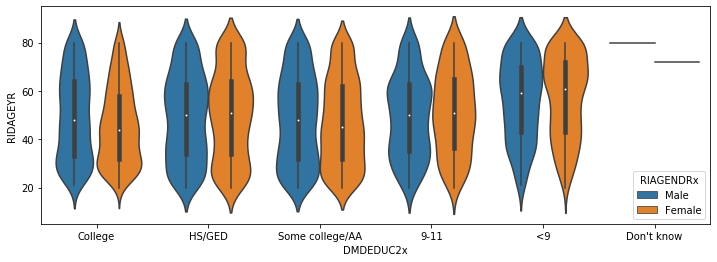

In [26]:
da["DMDEDUC2x"] = da.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})
plt.figure(figsize=(12, 4))
a = sns.violinplot(x= da.DMDEDUC2x, y=da.RIDAGEYR, hue = da.RIAGENDRx)

__Q3a.__ Comment on any evident differences among the age distributions in the different demographic groups.

Women who completed college tend to skew younger whereas men have a more even distribution of age. On the opposite end of the education spectrum, the distribution for both men and women who have completed less than 9 years of schooling skews older. 

## Question 4

Use violin plots to compare the distributions of BMI within a series of 10-year age bands.  Also stratify these plots by gender.

In [34]:
da.RIDAGEYR.describe()

count    5735.000000
mean       48.052310
std        18.431011
min        18.000000
25%        32.000000
50%        48.000000
75%        63.000000
max        80.000000
Name: RIDAGEYR, dtype: float64

In [36]:
da['agegrp'] = pd.cut(da.RIDAGEYR, [17,24,35,40,50,60,70,80])

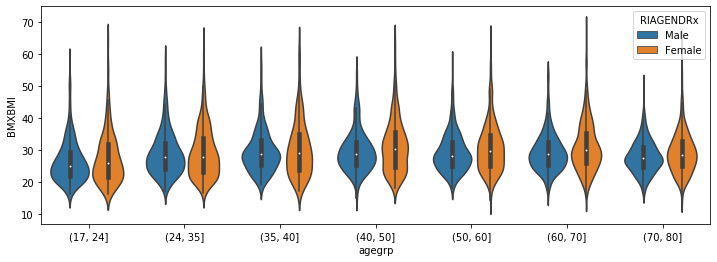

In [37]:
plt.figure(figsize=(12, 4))
a = sns.violinplot(x= da.agegrp, y=da.BMXBMI, hue = da.RIAGENDRx)

__Q4a.__ Comment on the trends in BMI across the demographic groups.

Male BMI clustered between 20-30 for almost every age group. Female BMI is more widely distributed, with a less obvious cluster and longer tails.

## Question 5

Construct a frequency table for the joint distribution of ethnicity groups ([RIDRETH1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDRETH1)) and health-insurance status ([HIQ210](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/HIQ_I.htm#HIQ210)).  Normalize the results so that the values within each ethnic group are proportions that sum to 1.

In [45]:
# Joint Distribution
x = pd.crosstab(da.RIDRETH1, da.HIQ210)
x

HIQ210,1.0,2.0,9.0
RIDRETH1,,,
1,93,578,3
2,74,501,0
3,111,1535,2
4,113,926,1
5,65,728,2


In [52]:
# Normalize
x_norm = x.apply(lambda z: z/z.sum(), axis=1)
#x_norm['total'] = x_norm.iloc[:,0] + x_norm.iloc[:,1] + x_norm.iloc[:,2]
x_norm

HIQ210,1.0,2.0,9.0,total
RIDRETH1,,,,
1,0.137982,0.857567,0.004451,1.0
2,0.128696,0.871304,0.000000,1.0
3,0.067354,0.931432,0.001214,1.0
4,0.108654,0.890385,0.000962,1.0
5,0.081761,0.915723,0.002516,1.0


__Q5a.__ Which ethnic group has the highest rate of being uninsured in the past year?

Ethnic group 1, Mexican Americans